<a href="https://colab.research.google.com/github/wayuu/modelo_predicci-n_diabetes_pycaret/blob/main/pycaret_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 945.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 117.7 MB/s eta 0:00:00
   ━

# Sección nueva

In [ ]:
!pip install kaggle

In [ ]:
import pycaret
from pycaret.classification import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


En esta secciòn coloca tu username y key dados por kaggle: el api_token(es privada, cuidado con compartirla)

In [ ]:
api_token = {"username":"","key":""}

In [ ]:
!rm -rf /root/.kaggle.

In [ ]:
!mkdir /root/.kaggle

In [ ]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
 # !kaggle datasets list

In [ ]:
!cmod 600 /root/.kaggle/kaggle.json


/bin/bash: line 1: cmod: command not found


In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pima-indians-diabetes-database.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(data.shape)

(768, 9)


In [ ]:
print(data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


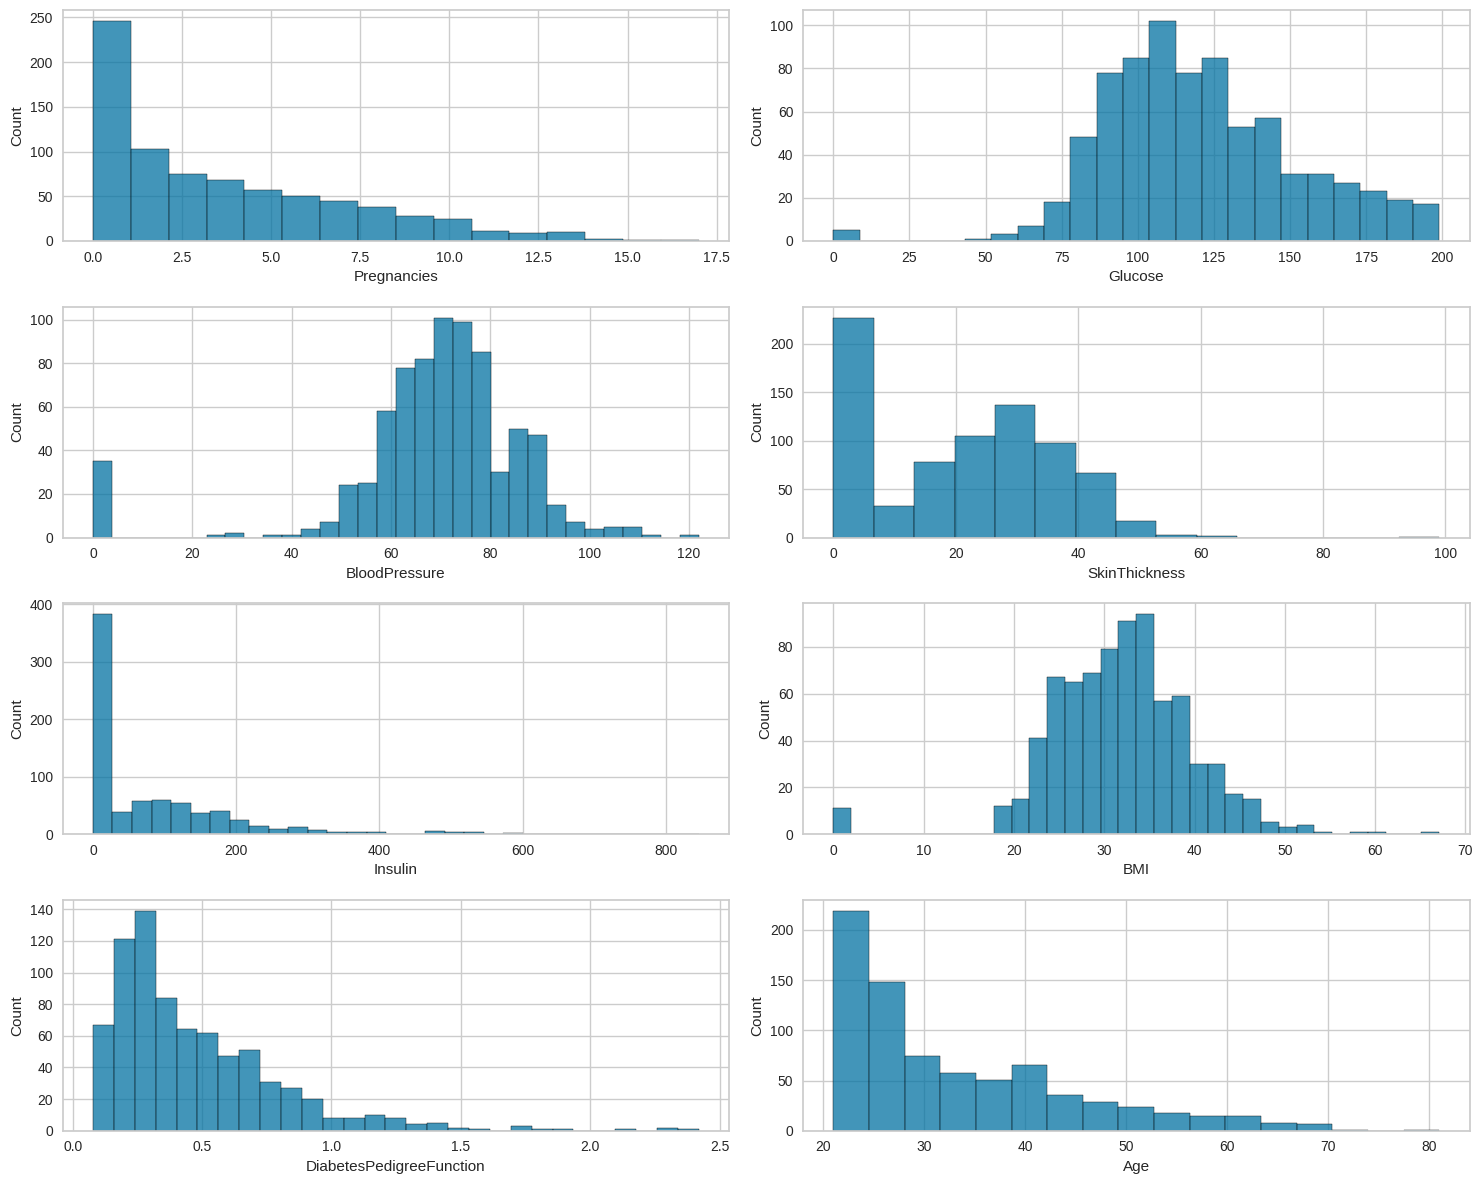

In [ ]:

fig, axs = plt.subplots(4, 2, figsize=(15, 12))

sns.histplot(data['Pregnancies'], ax=axs[0, 0])
sns.histplot(data['Glucose'], ax=axs[0, 1])
sns.histplot(data['BloodPressure'], ax=axs[1, 0])
sns.histplot(data['SkinThickness'], ax=axs[1, 1])
sns.histplot(data['Insulin'], ax=axs[2, 0])
sns.histplot(data['BMI'], ax=axs[2, 1])
sns.histplot(data['DiabetesPedigreeFunction'], ax=axs[3, 0])
sns.histplot(data['Age'], ax=axs[3, 1])

plt.tight_layout()
plt.show()



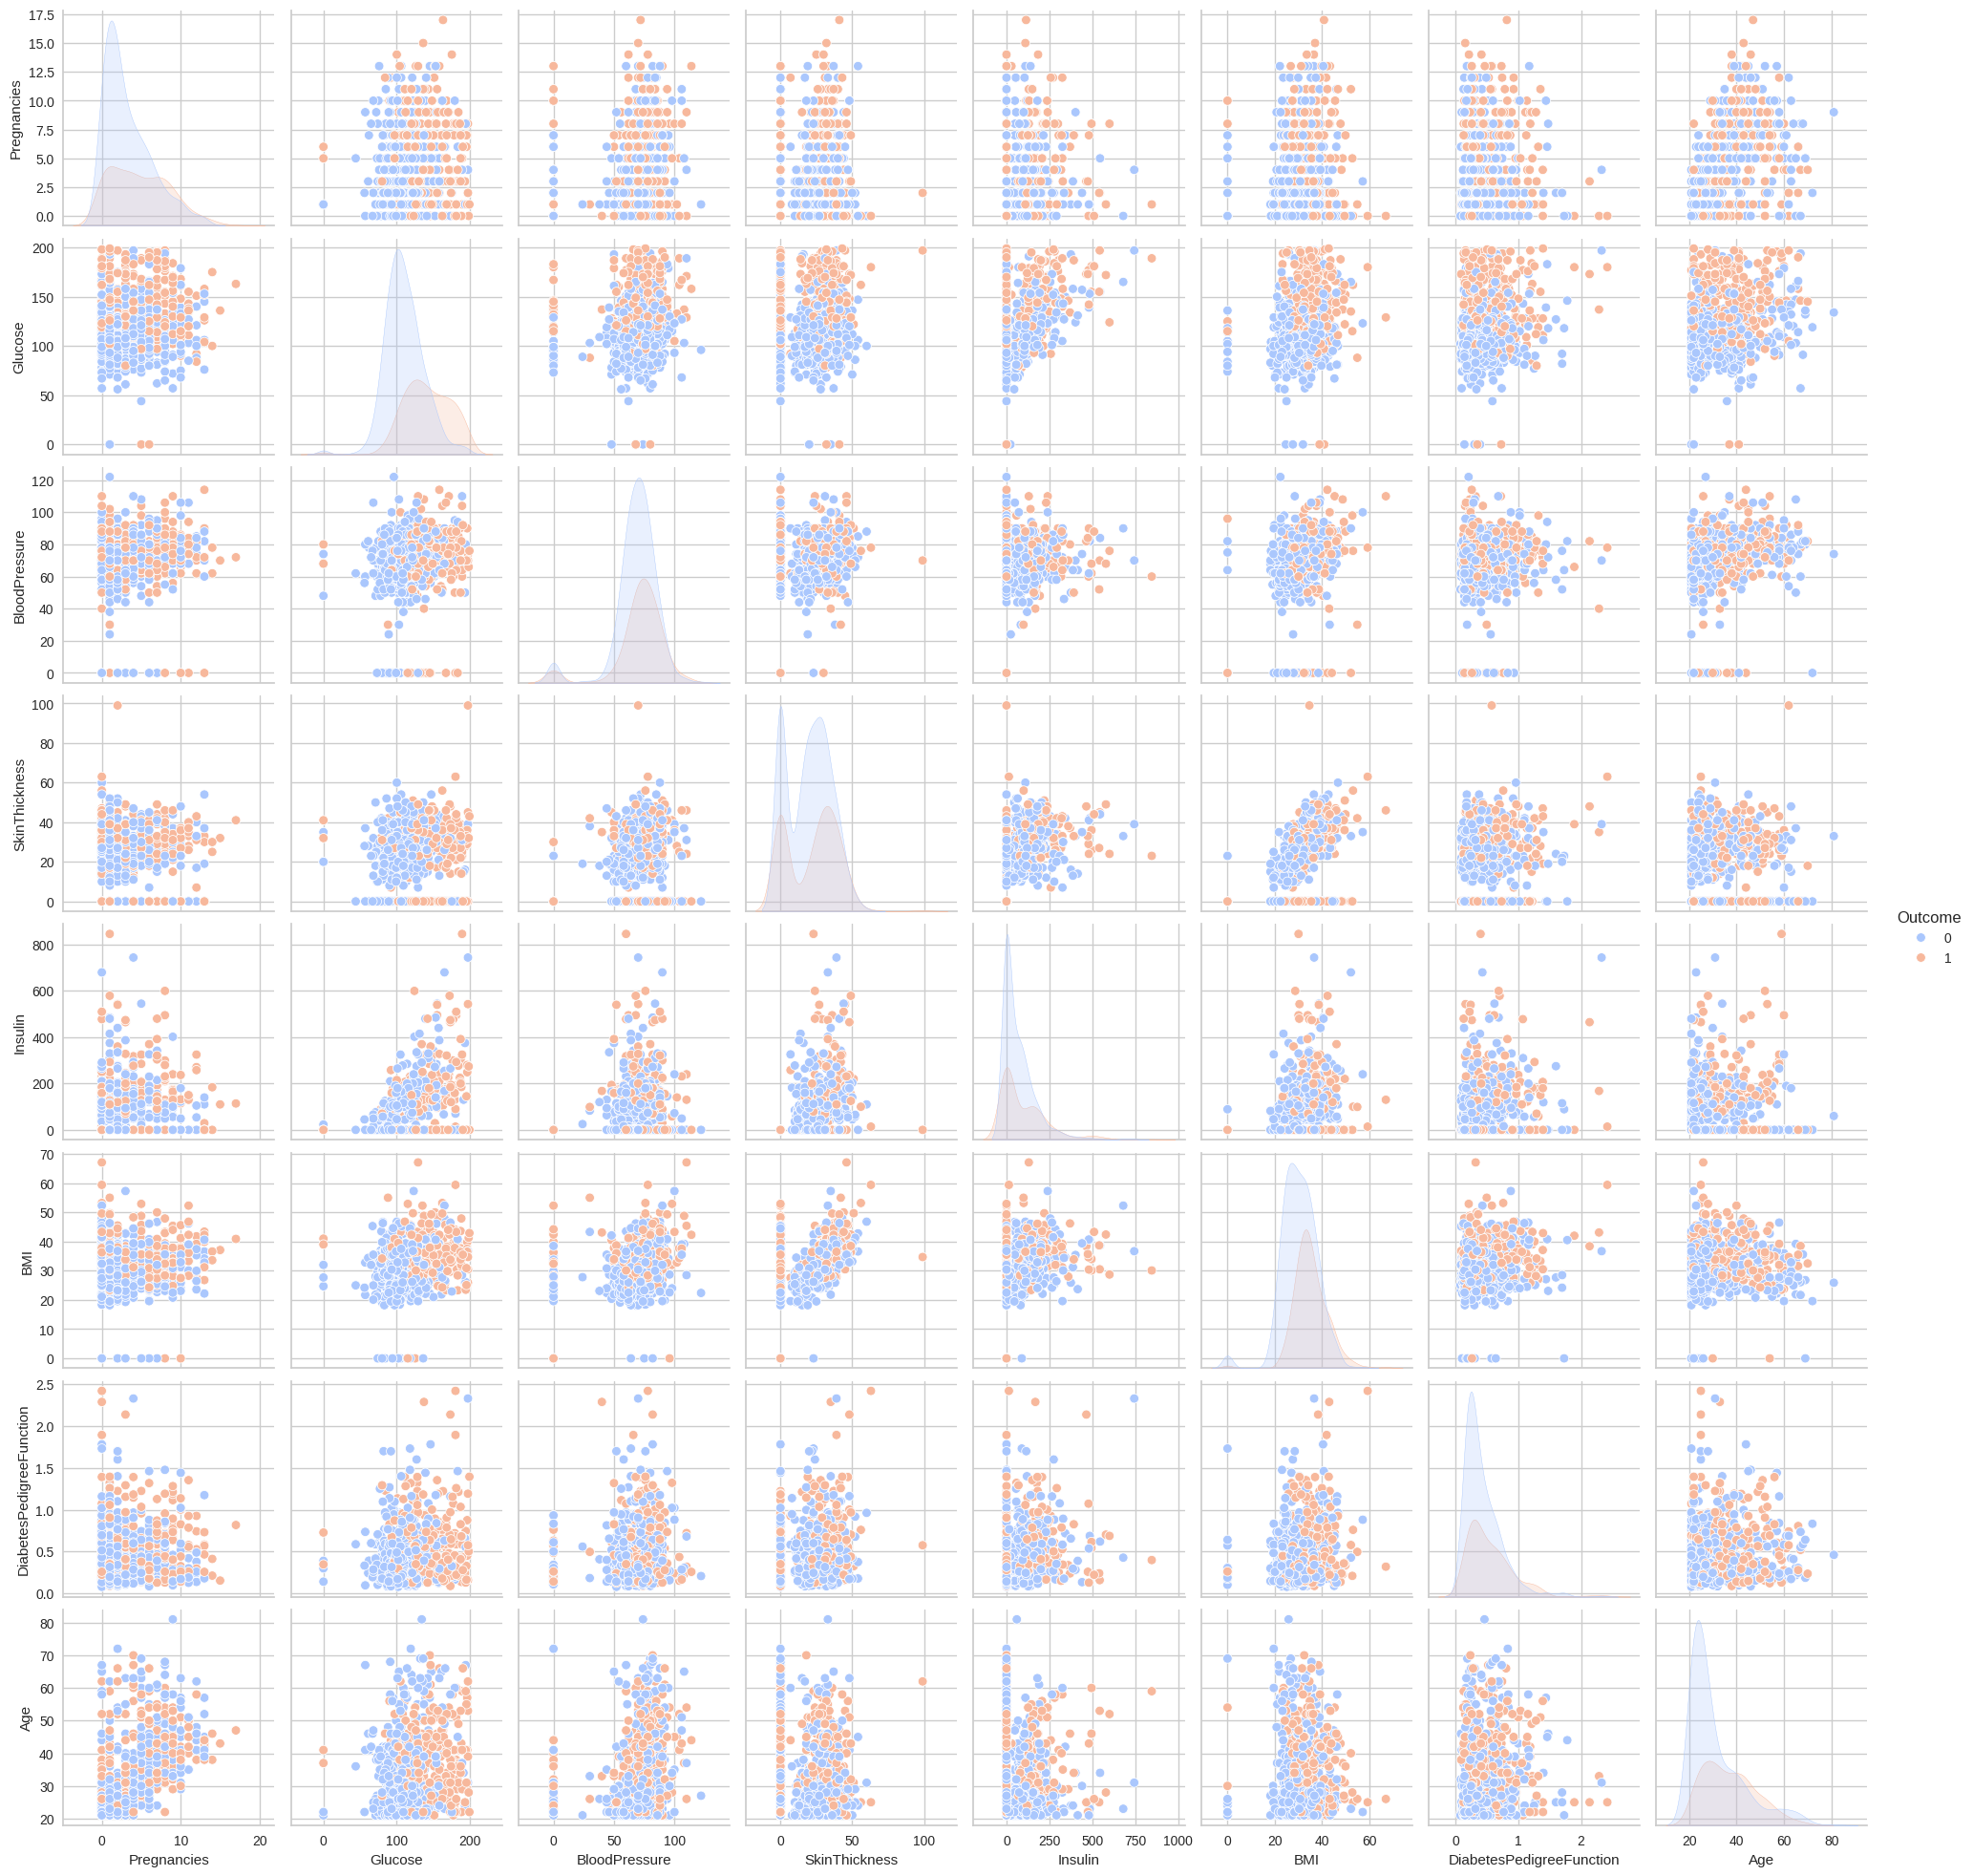

In [ ]:


# Par de gráficos de dispersión
sns.pairplot(data, diag_kind='kde', hue='Outcome', palette='coolwarm')
plt.show()

In [ ]:


# Identificar las columnas que no deberían tener valores de cero
columnas_con_ceros_invalidos = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Reemplazar los valores de 0 en estas columnas con NaN para facilitar el reemplazo
data[columnas_con_ceros_invalidos] = data[columnas_con_ceros_invalidos].replace(0, np.nan)
# Reemplazar los valores NaN con la media de cada columna
for columna in columnas_con_ceros_invalidos:
    media_columna = data[columna].mean()  # Calcular la media excluyendo NaN
    data[columna].fillna(media_columna, inplace=True)  # Reemplazar NaN con la media
print(data[columnas_con_ceros_invalidos].head())


   Glucose  BloodPressure  SkinThickness     Insulin   BMI
0    148.0           72.0       35.00000  155.548223  33.6
1     85.0           66.0       29.00000  155.548223  26.6
2    183.0           64.0       29.15342  155.548223  23.3
3     89.0           66.0       23.00000   94.000000  28.1
4    137.0           40.0       35.00000  168.000000  43.1


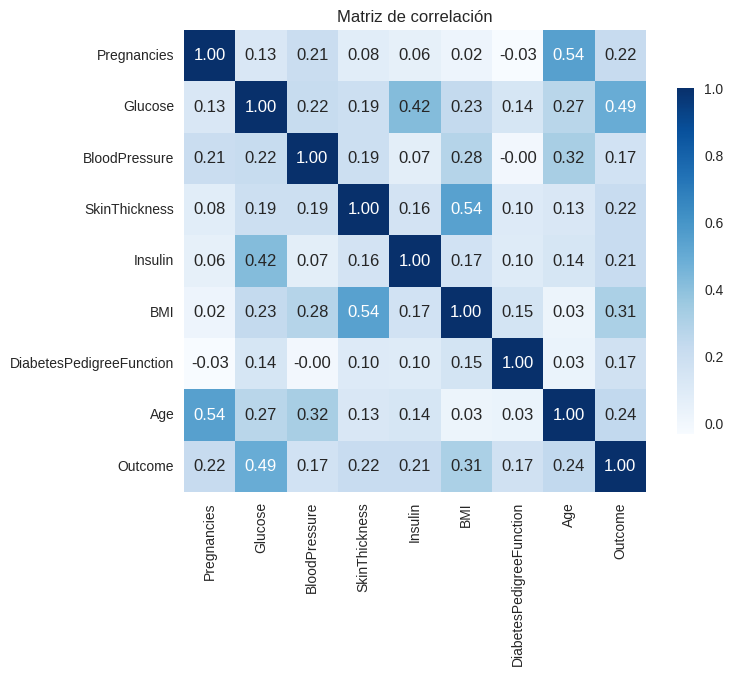

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", square=True, cbar_kws={"shrink": .75})
plt.title('Matriz de correlación')  # Título del gráfico
plt.show()

In [ ]:
# Configuración inicial de PyCaret con un 80% de datos para entrenamiento y 20% para prueba
clf_setup = setup(data=data,
                  target='Outcome',
                  train_size=0.8,       # Cambia la proporción de división
                  normalize=True,
                  feature_selection=True,
                  remove_multicollinearity=True,
                  multicollinearity_threshold=0.95,
                  fix_imbalance=True,
                  session_id=123)

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(954, 2)"
5,Transformed train set shape,"(800, 2)"
6,Transformed test set shape,"(154, 2)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Lista de proporciones de entrenamiento para probar
train_sizes = [0.6, 0.7, 0.8, 0.9]
resultados = []

for train_size in train_sizes:
    print(f"\nEvaluando con train_size = {train_size*100}%")

    # Configuración de PyCaret con proporción de entrenamiento modificada
    clf_setup = setup(data=data,
                      target='Outcome',
                      train_size=train_size,
                      normalize=True,
                      feature_selection=True,
                      remove_multicollinearity=True,
                      multicollinearity_threshold=0.95,
                      fix_imbalance=True,
                      session_id=123,
                      html=False,       # Suprime la salida de HTML
                      verbose=False)    # Reduce los mensajes en consola



Evaluando con train_size = 60.0%
[LightGBM] [Info] Number of positive: 299, number of negative: 299
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 598, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
compare_models(exclude=['ransac'])

In [ ]:
compare_models(exclude=['ransac'],
                             n_select=3,              # Selecciona los 3 mejores modelos
                             sort='AUC',              # Ordenar los modelos por el Área bajo la curva (AUC)
                             fold=10,                 # Validación cruzada de 10 particiones
                             round=4,                 # Redondeo de métricas a 4 decimales
                             turbo=True)              # Turbo True para una ejecución más rápida


In [ ]:
# Comparar modelos y seleccionar los tres mejores modelos
best_models = compare_models(n_select=3)
# Obtener el DataFrame de resultados de comparación para ver las métricas disponibles
resultados_modelos = pull()
print(resultados_modelos)


In [ ]:
models()

In [ ]:
ada = create_model('ada')

In [ ]:
svm = create_model('svm')

In [ ]:
nb = create_model('nb')

In [ ]:
qda = create_model('qda')

In [ ]:
print(ada)
print(svm)
print(nb)
print(qda)

In [ ]:
tuned_ada = tune_model(ada)

In [ ]:
tuned_svm = tune_model(svm)

In [ ]:
tuned_nb = tune_model(nb)

In [ ]:
tuned_qda = tune_model(qda)

In [ ]:
print(tuned_ada)
print(tuned_svm)
print(tuned_nb)
print(tuned_qda)

In [ ]:
evaluate_model(tuned_ada)

In [ ]:
interpret_model(tuned_ada)

In [ ]:

# evaluate_model(tuned_svm)

In [ ]:

# evaluate_model(tuned_nb)

In [ ]:

# evaluate_model(tuned_qda)

In [ ]:
predict_model(tuned_ada)

In [ ]:
final_ada = finalize_model(tuned_ada)

In [ ]:
print(final_ada)

In [ ]:
# Supón que tienes un conjunto de datos no visto llamado data_unseen
data_unseen = data.sample(10)  # Ejemplo, puedes cargar un archivo nuevo

# Realizar predicciones en el conjunto de datos no visto
predictions = predict_model(tuned_ada, data=data_unseen)
print(predictions[['Outcome', 'prediction_label']])  # Mostrar valor real y predicción


In [ ]:
# Guardar el modelo entrenado de AdaBoost
save_model(tuned_ada, 'modelo_adaboost_diabetes')


In [ ]:
predict_model(final_ada)

In [ ]:
unseen_predictions = predict_model(final_ada, data=data_unseen)
unseen_predictions.head()


In [ ]:
print(unseen_predictions.columns)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Suponiendo que unseen_predictions contiene las predicciones generadas
accuracy = accuracy_score(data_unseen['Outcome'], unseen_predictions['prediction_label'])
print(f"Accuracy: {accuracy}")

# Generar un reporte de clasificación con métricas adicionales
print(classification_report(data_unseen['Outcome'], unseen_predictions['prediction_label']))


In [ ]:
# Cargar el modelo guardado
modelo_adaboost = load_model('modelo_adaboost_diabetes')

# Hacer predicciones con el modelo cargado
nuevas_predicciones = predict_model(modelo_adaboost, data=data_unseen)
print(nuevas_predicciones[['Outcome', 'prediction_label']])


In [ ]:
save_model(final_ada, 'modelo_adaboost_diabetes')

In [ ]:
from flask import Flask, request, jsonify
from pycaret.classification import load_model, predict_model
import pandas as pd

app = Flask(__name__)

# Cargar el modelo
modelo_adaboost = load_model('modelo_adaboost_diabetes')

@app.route('/predict', methods=['POST'])
def predict():
    # Obtener los datos de la solicitud en formato JSON
    data = request.get_json()
    # Convertir los datos a DataFrame de pandas
    data_df = pd.DataFrame([data])
    # Realizar la predicción
    prediction = predict_model(modelo_adaboost, data=data_df)
    # Retornar el resultado de la predicción en formato JSON
    return jsonify(prediction['Label'][0])

if __name__ == '__main__':
    app.run(debug=True)